In [ ]:
!pip3 install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip3 install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.3 MB/s eta 0:00:00


In [ ]:
!pip install pytorch-pretrained-bert pytorch-nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
!pip3 install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/tcombined_news.csv')

In [ ]:
train_df.head()

,Title,Link,Published,Summary
0,"Uddhav had no right to remove Shinde, says spe...",https://timesofindia.indiatimes.com/india/maha...,"Wed, 10 Jan 2024 17:58:39 +0530",NaN
1,"'No disciplinary action against Ishan, Iyer': ...",https://timesofindia.indiatimes.com/sports/cri...,"Wed, 10 Jan 2024 18:27:43 +0530","Rahul Dravid, India's head coach, refuted medi..."
2,"'RSS/BJP event': Sonia, Kharge decline Ram Man...",https://timesofindia.indiatimes.com/india/cong...,"Wed, 10 Jan 2024 16:14:18 +0530",NaN
3,Manipur approves venue for Rahul's 'Bharat Jod...,https://timesofindia.indiatimes.com/india/mani...,"Wed, 10 Jan 2024 18:50:31 +0530",NaN
4,Virat Kohli to miss T20 opener against Afghani...,https://timesofindia.indiatimes.com/sports/cri...,"Wed, 10 Jan 2024 17:57:13 +0530",Both Virat Kohli and captain Rohit Sharma made...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Link').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Published').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Summary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Link'].value_counts()
    for x_label, grp in _df_4.groupby('Title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Title')
_ = plt.ylabel('Link')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Published'].value_counts()
    for x_label, grp in _df_5.groupby('Link')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Link')
_ = plt.ylabel('Published')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Summary'].value_counts()
    for x_label, grp in _df_6.groupby('Published')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Published')
_ = plt.ylabel('Summary')

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
train_df.isnull().sum()

Title         0
Link          0
Published    32
Summary      29
dtype: int64

In [ ]:
df=train_df.isnull()

In [ ]:
df

,Title,Link,Published,Summary
0,False,False,False,True
1,False,False,False,False
2,False,False,False,True
3,False,False,False,True
4,False,False,False,False
...,...,...,...,...
509,False,False,False,False
510,False,False,False,False
511,False,False,False,False
512,False,False,False,False


In [ ]:
!pip install feedparser

In [ ]:
import feedparser
NewsFeed = feedparser.parse("https://timesofindia.indiatimes.com/rssfeedstopstories.cms")
entry = NewsFeed.entries[1]

print(entry.keys())

dict_keys(['title', 'title_detail', 'summary', 'summary_detail', 'links', 'link', 'id', 'guidislink', 'published', 'published_parsed', 'authors', 'author', 'author_detail'])


In [ ]:
import feedparser
import pandas as pd

# Parse the RSS feed
NewsFeed = feedparser.parse("https://timesofindia.indiatimes.com/rssfeedstopstories.cms")
entries = NewsFeed.entries

# Create a list to store individual news entries
news_data = []

# Extract relevant information from each entry
for entry in entries:
    news_entry = {
        "Title": entry.title,
        "Link": entry.link,
        "Published": entry.published,
        "Summary": entry.summary
    }
    news_data.append(news_entry)

# Convert the list of dictionaries to a DataFrame
news_df = pd.DataFrame(news_data)


# Display the DataFrame
news_df


,Title,Link,Published,Summary
0,'MS Dhoni has given me two-three...': Shivam Dube,https://timesofindia.indiatimes.com/sports/cri...,"Fri, 12 Jan 2024 14:52:24 +0530",Shivam Dube marked his impactful comeback to t...
1,"Checked-in bag tampered with, flyer loses Rs 1...",https://timesofindia.indiatimes.com/city/mumba...,"Fri, 12 Jan 2024 06:20:00 +0530",
2,Can't tolerate fight for son's custody anymore...,https://timesofindia.indiatimes.com/city/goa/c...,"Fri, 12 Jan 2024 02:02:32 +0530",
3,Pench reserve named India's 1st 'international...,https://timesofindia.indiatimes.com/city/nagpu...,"Fri, 12 Jan 2024 08:22:12 +0530",
4,US FCC wants Indian govt to keep an eye on the...,https://timesofindia.indiatimes.com/gadgets-ne...,"Fri, 12 Jan 2024 13:39:53 +0530",India's proactive approach to data security an...
5,"Sensex closes over 840 points up, Nifty50 near...",https://timesofindia.indiatimes.com/business/i...,"Fri, 12 Jan 2024 10:54:51 +0530","Stock market today: Indian benchmark indices, ..."
6,Watching porn an addiction; punishment no solu...,https://timesofindia.indiatimes.com/city/chenn...,"Fri, 12 Jan 2024 15:03:40 +0530",Justice N Anand Venkatesh made the observation...
7,Engineering dropout held for burglaries in Hyd...,https://timesofindia.indiatimes.com/city/hyder...,"Fri, 12 Jan 2024 08:19:22 +0530",A 29-year-old engineering dropout from Andhra ...
8,Momo-seller stabs man over extra red sauce in ...,https://timesofindia.indiatimes.com/city/delhi...,"Fri, 12 Jan 2024 05:59:53 +0530",A 32-year-old man was stabbed multiple times o...
9,ChatGPT maker Sam Altman ties the knot in secr...,https://timesofindia.indiatimes.com/gadgets-ne...,"Fri, 12 Jan 2024 12:26:30 +0530",


In [ ]:
print(len(news_df))

36


In [ ]:
NewsFeed = feedparser.parse("http://feeds.bbci.co.uk/news/world/rss.xml")
entries = NewsFeed.entries

print(len(entries))

# Extract relevant information from each entry
for entry in entries:
    news_entry = {
        "Title": entry.title,
        "Link": entry.link,
        "Published": entry.published,
        "Summary": entry.summary
    }
    news_data.append(news_entry)

# Convert the list of dictionaries to a DataFrame
news_df = pd.DataFrame(news_data)

# Display the DataFrame
news_df.tail()


42


,Title,Link,Published,Summary
115,Mozambique storms: How to cyclone-proof your life,https://www.bbc.co.uk/news/world-africa-679375...,"Thu, 11 Jan 2024 00:04:52 GMT",Mozambicans learn to build stronger houses as ...
116,How Ecuador descended into gang violence,https://www.bbc.co.uk/news/world-latin-america...,"Wed, 10 Jan 2024 13:20:36 GMT",A closer look at what is behind the wave of vi...
117,Animators say ‘AI isn't going to get you an Os...,https://www.bbc.co.uk/news/business-67922588?a...,"Thu, 11 Jan 2024 00:15:56 GMT",Comic book writers and animators fear the grow...
118,Scientists crack mystery of how MS gene spread,https://www.bbc.co.uk/news/health-67917294?at_...,"Wed, 10 Jan 2024 16:09:53 GMT",The DNA of ancient cattle herders has revealed...
119,TB Joshua’s daughter: Tortured after standing ...,https://www.bbc.co.uk/news/world-africa-679239...,"Wed, 10 Jan 2024 00:00:11 GMT",The first person to blow the whistle on the ab...


In [ ]:
NewsFeed = feedparser.parse("http://rss.cnn.com/rss/cnn_topstories.rss")
entry = NewsFeed.entries[0]

print(entry.keys())


dict_keys(['title', 'title_detail', 'links', 'link', 'id', 'guidislink', 'published', 'published_parsed', 'media_content'])


In [ ]:
NewsFeed = feedparser.parse("http://rss.cnn.com/rss/cnn_topstories.rss")
entries = NewsFeed.entries

print(len(entries))

for entry in entries:

    published_date = entry.published if 'published' in entry else None
    news_entry = {
        "Title": entry.title,
        "Link": entry.link,
        "Published": published_date,
        "Summary": entry.title_detail['value']
    }
    news_data.append(news_entry)

# Convert the list of dictionaries to a DataFrame
news_df = pd.DataFrame(news_data)

# Display the DataFrame

news_df



69


,Title,Link,Published,Summary
0,'MS Dhoni has given me two-three...': Shivam Dube,https://timesofindia.indiatimes.com/sports/cri...,"Fri, 12 Jan 2024 14:52:24 +0530",Shivam Dube marked his impactful comeback to t...
1,"Checked-in bag tampered with, flyer loses Rs 1...",https://timesofindia.indiatimes.com/city/mumba...,"Fri, 12 Jan 2024 06:20:00 +0530",
2,Can't tolerate fight for son's custody anymore...,https://timesofindia.indiatimes.com/city/goa/c...,"Fri, 12 Jan 2024 02:02:32 +0530",
3,Pench reserve named India's 1st 'international...,https://timesofindia.indiatimes.com/city/nagpu...,"Fri, 12 Jan 2024 08:22:12 +0530",
4,US FCC wants Indian govt to keep an eye on the...,https://timesofindia.indiatimes.com/gadgets-ne...,"Fri, 12 Jan 2024 13:39:53 +0530",India's proactive approach to data security an...
...,...,...,...,...
184,Michelle Yeoh set to return in new 'Star Trek'...,https://www.cnn.com/2023/04/18/entertainment/m...,"Tue, 18 Apr 2023 19:11:23 GMT",Michelle Yeoh set to return in new 'Star Trek'...
185,Recap: 'Succession' finds dark humor in the af...,https://www.cnn.com/2023/04/16/entertainment/s...,"Mon, 17 Apr 2023 02:28:12 GMT",Recap: 'Succession' finds dark humor in the af...
186,'Yellowjackets' leans hard into '90s music nos...,https://www.cnn.com/2023/04/14/entertainment/y...,"Mon, 01 May 2023 23:02:04 GMT",'Yellowjackets' leans hard into '90s music nos...
187,Jeremy Renner revisits 'the amazing group of p...,https://www.cnn.com/2023/04/16/entertainment/j...,"Sun, 16 Apr 2023 19:04:10 GMT",Jeremy Renner revisits 'the amazing group of p...


In [ ]:
print(len(news_df))

189


In [ ]:
news_df.describe()

,Title,Link,Published,Summary
count,189,189,173,189
unique,147,147,131,139
top,Mozambique storms: How to cyclone-proof your life,https://www.bbc.co.uk/news/world-africa-679375...,"Tue, 09 Jan 2024 21:35:45 GMT",
freq,2,2,2,9


In [ ]:
# Parse the RSS feed
NewsFeed = feedparser.parse("https://www.theguardian.com/world/rss")
entries = NewsFeed.entries[0]

print(entries)

# Create a list to store individual news entries


{'title': 'UK government admits Rwanda has ‘issues with its human rights record’', 'title_detail': {'type': 'text/plain', 'language': None, 'base': 'https://www.theguardian.com/world/rss', 'value': 'UK government admits Rwanda has ‘issues with its human rights record’'}, 'links': [{'rel': 'alternate', 'type': 'text/html', 'href': 'https://www.theguardian.com/uk-news/2024/jan/11/uk-government-admits-rwanda-human-rights-record-issues-asylum-rishi-sunak'}], 'link': 'https://www.theguardian.com/uk-news/2024/jan/11/uk-government-admits-rwanda-human-rights-record-issues-asylum-rishi-sunak', 'summary': '<p>Assessment comes despite claims by Rishi Sunak that Rwanda is safe when making case for asylum policy</p><p>The government has admitted that Rwanda still has “issues with its human rights record” despite claims by Rishi Sunak that it is a safe country.</p><p>Documents released on Thursday said that “while Rwanda is now a relatively peaceful country with respect for the rule of law, there ar

In [ ]:
import feedparser
import pandas as pd

# Parse the RSS feed
NewsFeed = feedparser.parse("https://www.theguardian.com/world/rss")
entries = NewsFeed.entries
print(len(entries))

# Create a list to store individual news entries
temp_news_data = []

# Extract relevant information from each entry
for entry in entries:
    # Check if 'entry' is a dictionary
    if isinstance(entry, dict):
        # Check if 'link' is a dictionary
        if isinstance(entry.get('link'), dict):
            link = entry.link.get('href', '')
        else:
            link = entry.link

        news_entry = {
            "Title": entry.get('title', ''),
            "Link": link,
            "Published": entry.get('published', ''),
            "Summary": entry.get('title_detail', {}).get('value', '')
        }
        temp_news_data.append(news_entry)

# Convert the list of dictionaries to a DataFrame
temp_news_df = pd.DataFrame(temp_news_data)

# Display the DataFrame
temp_news_df


54


,Title,Link,Published,Summary
0,UK government admits Rwanda has ‘issues with i...,https://www.theguardian.com/uk-news/2024/jan/1...,"Thu, 11 Jan 2024 20:09:35 GMT",UK government admits Rwanda has ‘issues with i...
1,Human rights in decline globally as leaders fa...,https://www.theguardian.com/global-development...,"Thu, 11 Jan 2024 15:30:22 GMT",Human rights in decline globally as leaders fa...
2,The Gambia team make emergency landing on way ...,https://www.theguardian.com/football/2024/jan/...,"Thu, 11 Jan 2024 13:49:37 GMT",The Gambia team make emergency landing on way ...
3,Hearings to begin at The Hague in case claimin...,https://www.theguardian.com/world/2024/jan/11/...,"Thu, 11 Jan 2024 04:00:30 GMT",Hearings to begin at The Hague in case claimin...
4,Al-Shabaab militants seize UN helicopter killi...,https://www.theguardian.com/world/2024/jan/10/...,"Wed, 10 Jan 2024 22:41:41 GMT",Al-Shabaab militants seize UN helicopter killi...
5,Police on alert for potential violence at Erit...,https://www.theguardian.com/australia-news/202...,"Wed, 10 Jan 2024 01:57:59 GMT",Police on alert for potential violence at Erit...
6,"Valley of lost cities that flourished 2,000 ye...",https://www.theguardian.com/science/2024/jan/1...,"Thu, 11 Jan 2024 20:26:08 GMT","Valley of lost cities that flourished 2,000 ye..."
7,Ecuador’s biggest city ‘a desert’ as state tri...,https://www.theguardian.com/world/2024/jan/11/...,"Thu, 11 Jan 2024 19:15:38 GMT",Ecuador’s biggest city ‘a desert’ as state tri...
8,Visitors to Colombia warned over dating apps a...,https://www.theguardian.com/world/2024/jan/11/...,"Thu, 11 Jan 2024 17:25:38 GMT",Visitors to Colombia warned over dating apps a...
9,‘Brutal’ Arctic blast expected to bring frigid...,https://www.theguardian.com/us-news/2024/jan/1...,"Thu, 11 Jan 2024 16:44:21 GMT",‘Brutal’ Arctic blast expected to bring frigid...


In [ ]:
NewsFeed = feedparser.parse("http://feeds.feedburner.com/TechCrunch/")
entries = NewsFeed.entries
print(len(entries))

print(entries)

19
[{'id': 'tag:blogger.com,1999:blog-2525761963252134386.post-8678580919580467236', 'guidislink': False, 'published': 'Tue, 12 Dec 2023 16:10:00 +0000', 'published_parsed': time.struct_time(tm_year=2023, tm_mon=12, tm_mday=12, tm_hour=16, tm_min=10, tm_sec=0, tm_wday=1, tm_yday=346, tm_isdst=0), 'updated': '2023-12-13T15:41:48.515+05:00', 'updated_parsed': time.struct_time(tm_year=2023, tm_mon=12, tm_mday=13, tm_hour=10, tm_min=41, tm_sec=48, tm_wday=2, tm_yday=347, tm_isdst=0), 'tags': [{'term': 'Ai', 'scheme': 'http://www.blogger.com/atom/ns#', 'label': None}], 'title': 'LimeWire AI Studio Review 2023: Details, Pricing & Features', 'title_detail': {'type': 'text/plain', 'language': None, 'base': 'http://feeds.feedburner.com/TechCrunch/', 'value': 'LimeWire AI Studio Review 2023: Details, Pricing & Features'}, 'summary': '<p style="text-align: left;"><span style="font-family: Oxygen;">&nbsp;</span></p><p style="text-align: left;"><span style="font-family: Oxygen;">In the rapidly adva

In [ ]:
# Extract relevant information from each entry
for entry in entries:
    # Check if 'entry' is a dictionary
    if isinstance(entry, dict):
        # Check if 'link' is a dictionary
        if isinstance(entry.get('link'), dict):
            link = entry.link.get('href', '')
        else:
            link = entry.link

        news_entry = {
            "Title": entry.get('title', ''),
            "Link": link,
            "Published": entry.get('published', ''),
            "Summary": entry.get('title_detail', {}).get('value', '')
        }
        temp_news_data.append(news_entry)

# Convert the list of dictionaries to a DataFrame
temp_news_df = pd.DataFrame(temp_news_data)

# Display the DataFrame
temp_news_df

,Title,Link,Published,Summary
0,UK government admits Rwanda has ‘issues with i...,https://www.theguardian.com/uk-news/2024/jan/1...,"Thu, 11 Jan 2024 20:09:35 GMT",UK government admits Rwanda has ‘issues with i...
1,Human rights in decline globally as leaders fa...,https://www.theguardian.com/global-development...,"Thu, 11 Jan 2024 15:30:22 GMT",Human rights in decline globally as leaders fa...
2,The Gambia team make emergency landing on way ...,https://www.theguardian.com/football/2024/jan/...,"Thu, 11 Jan 2024 13:49:37 GMT",The Gambia team make emergency landing on way ...
3,Hearings to begin at The Hague in case claimin...,https://www.theguardian.com/world/2024/jan/11/...,"Thu, 11 Jan 2024 04:00:30 GMT",Hearings to begin at The Hague in case claimin...
4,Al-Shabaab militants seize UN helicopter killi...,https://www.theguardian.com/world/2024/jan/10/...,"Wed, 10 Jan 2024 22:41:41 GMT",Al-Shabaab militants seize UN helicopter killi...
...,...,...,...,...
68,Most Frequently Asked Questions About NFTs(Non...,https://techncruncher.blogspot.com/2022/02/mos...,"Sun, 06 Feb 2022 10:04:00 +0000",Most Frequently Asked Questions About NFTs(Non...
69,10 Best Chrome Extensions That Are Perfect for...,https://techncruncher.blogspot.com/2022/01/10-...,"Mon, 31 Jan 2022 10:56:00 +0000",10 Best Chrome Extensions That Are Perfect for...
70,Most Frequently Asked Questions About Email M...,https://techncruncher.blogspot.com/2022/01/mos...,"Sat, 29 Jan 2022 12:45:00 +0000",Most Frequently Asked Questions About Email M...
71,7 Free Websites Every Content Creator Needs to...,https://techncruncher.blogspot.com/2022/01/7-f...,"Thu, 27 Jan 2022 15:19:00 +0000",7 Free Websites Every Content Creator Needs to...


In [ ]:
temp_news_df.isnull().sum()

Title        0
Link         0
Published    0
Summary      0
dtype: int64

In [ ]:
NewsFeed = feedparser.parse("https://rss.nytimes.com/services/xml/rss/nyt/HomePage.xml")
entries = NewsFeed.entries
print(len(entries))

print(entries)

25
[{'title': 'U.S. Missiles Strike Houthi Targets in Yemen After Red Sea Attacks', 'title_detail': {'type': 'text/plain', 'language': None, 'base': 'https://rss.nytimes.com/services/xml/rss/nyt/HomePage.xml', 'value': 'U.S. Missiles Strike Houthi Targets in Yemen After Red Sea Attacks'}, 'links': [{'rel': 'alternate', 'type': 'text/html', 'href': 'https://www.nytimes.com/2024/01/11/us/politics/us-houthi-missile-strikes.html'}, {'href': 'https://www.nytimes.com/2024/01/11/us/politics/us-houthi-missile-strikes.html', 'rel': 'standout', 'type': 'text/html'}], 'link': 'https://www.nytimes.com/2024/01/11/us/politics/us-houthi-missile-strikes.html', 'id': 'https://www.nytimes.com/2024/01/11/us/politics/us-houthi-missile-strikes.html', 'guidislink': False, 'summary': 'The American-led strikes came in response to more than two dozen Houthi drone and missile attacks against commercial shipping in the Red Sea since the Israel-Hamas war began.', 'summary_detail': {'type': 'text/html', 'language'

In [ ]:
for entry in entries:
    # Check if 'entry' is a dictionary
    if isinstance(entry, dict):
        # Check if 'link' is a dictionary
        if isinstance(entry.get('link'), dict):
            link = entry.link.get('href', '')
        else:
            link = entry.link

        news_entry = {
            "Title": entry.get('title', ''),
            "Link": link,
            "Published": entry.get('published', ''),
            "Summary": entry.get('title_detail', {}).get('value', '')
        }
        temp_news_data.append(news_entry)

# Convert the list of dictionaries to a DataFrame
temp_news_df = pd.DataFrame(temp_news_data)

# Display the DataFrame
temp_news_df

,Title,Link,Published,Summary
0,UK government admits Rwanda has ‘issues with i...,https://www.theguardian.com/uk-news/2024/jan/1...,"Thu, 11 Jan 2024 20:09:35 GMT",UK government admits Rwanda has ‘issues with i...
1,Human rights in decline globally as leaders fa...,https://www.theguardian.com/global-development...,"Thu, 11 Jan 2024 15:30:22 GMT",Human rights in decline globally as leaders fa...
2,The Gambia team make emergency landing on way ...,https://www.theguardian.com/football/2024/jan/...,"Thu, 11 Jan 2024 13:49:37 GMT",The Gambia team make emergency landing on way ...
3,Hearings to begin at The Hague in case claimin...,https://www.theguardian.com/world/2024/jan/11/...,"Thu, 11 Jan 2024 04:00:30 GMT",Hearings to begin at The Hague in case claimin...
4,Al-Shabaab militants seize UN helicopter killi...,https://www.theguardian.com/world/2024/jan/10/...,"Wed, 10 Jan 2024 22:41:41 GMT",Al-Shabaab militants seize UN helicopter killi...
...,...,...,...,...
93,"Students Sue Harvard, Calling It a ‘Bastion’ o...",https://www.nytimes.com/2024/01/11/us/harvard-...,"Fri, 12 Jan 2024 04:24:26 +0000","Students Sue Harvard, Calling It a ‘Bastion’ o..."
94,U.S. Criminally Charges EBay in Cyberstalking ...,https://www.nytimes.com/2024/01/11/technology/...,"Fri, 12 Jan 2024 02:28:18 +0000",U.S. Criminally Charges EBay in Cyberstalking ...
95,Grand Jury Declines to Indict Ohio Woman Who M...,https://www.nytimes.com/2024/01/11/us/brittany...,"Fri, 12 Jan 2024 01:01:23 +0000",Grand Jury Declines to Indict Ohio Woman Who M...
96,‘Cooking With Lynja’ TikTok Star Dies at 67,https://www.nytimes.com/2024/01/11/dining/lynj...,"Fri, 12 Jan 2024 00:06:33 +0000",‘Cooking With Lynja’ TikTok Star Dies at 67


In [ ]:
combined_news_df = pd.concat([news_df, temp_news_df], ignore_index=True)
combined_news_df = combined_news_df.dropna(subset=['Summary'])
tcombined_news_df = pd.concat([combined_news_df,train_df],ignore_index=True)

# Display the combined DataFrame
tcombined_news_df

,Title,Link,Published,Summary
0,'MS Dhoni has given me two-three...': Shivam Dube,https://timesofindia.indiatimes.com/sports/cri...,"Fri, 12 Jan 2024 14:52:24 +0530",Shivam Dube marked his impactful comeback to t...
1,"Checked-in bag tampered with, flyer loses Rs 1...",https://timesofindia.indiatimes.com/city/mumba...,"Fri, 12 Jan 2024 06:20:00 +0530",
2,Can't tolerate fight for son's custody anymore...,https://timesofindia.indiatimes.com/city/goa/c...,"Fri, 12 Jan 2024 02:02:32 +0530",
3,Pench reserve named India's 1st 'international...,https://timesofindia.indiatimes.com/city/nagpu...,"Fri, 12 Jan 2024 08:22:12 +0530",
4,US FCC wants Indian govt to keep an eye on the...,https://timesofindia.indiatimes.com/gadgets-ne...,"Fri, 12 Jan 2024 13:39:53 +0530",India's proactive approach to data security an...
...,...,...,...,...
796,"Students Sue Harvard, Calling It a ‘Bastion’ o...",https://www.nytimes.com/2024/01/11/us/harvard-...,"Fri, 12 Jan 2024 04:24:26 +0000","Students Sue Harvard, Calling It a ‘Bastion’ o..."
797,U.S. Criminally Charges EBay in Cyberstalking ...,https://www.nytimes.com/2024/01/11/technology/...,"Fri, 12 Jan 2024 02:28:18 +0000",U.S. Criminally Charges EBay in Cyberstalking ...
798,Grand Jury Declines to Indict Ohio Woman Who M...,https://www.nytimes.com/2024/01/11/us/brittany...,"Fri, 12 Jan 2024 01:01:23 +0000",Grand Jury Declines to Indict Ohio Woman Who M...
799,‘Cooking With Lynja’ TikTok Star Dies at 67,https://www.nytimes.com/2024/01/11/dining/lynj...,"Fri, 12 Jan 2024 00:06:33 +0000",‘Cooking With Lynja’ TikTok Star Dies at 67


In [ ]:
tcombined_news_df.to_csv('/content/tcombined_news.csv', index=False)

In [ ]:
from google.colab import files
files.download('/content/tcombined_news.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tcombined_news_df['Training_summary']=tcombined_news_df['Title']+' '+str(tcombined_news_df['Summary'])
tcombined_news_df.head(15)

,Title,Link,Published,Summary,Training_summary
0,'MS Dhoni has given me two-three...': Shivam Dube,https://timesofindia.indiatimes.com/sports/cri...,"Fri, 12 Jan 2024 14:52:24 +0530",Shivam Dube marked his impactful comeback to t...,'MS Dhoni has given me two-three...': Shivam D...
1,"Checked-in bag tampered with, flyer loses Rs 1...",https://timesofindia.indiatimes.com/city/mumba...,"Fri, 12 Jan 2024 06:20:00 +0530",,"Checked-in bag tampered with, flyer loses Rs 1..."
2,Can't tolerate fight for son's custody anymore...,https://timesofindia.indiatimes.com/city/goa/c...,"Fri, 12 Jan 2024 02:02:32 +0530",,Can't tolerate fight for son's custody anymore...
3,Pench reserve named India's 1st 'international...,https://timesofindia.indiatimes.com/city/nagpu...,"Fri, 12 Jan 2024 08:22:12 +0530",,Pench reserve named India's 1st 'international...
4,US FCC wants Indian govt to keep an eye on the...,https://timesofindia.indiatimes.com/gadgets-ne...,"Fri, 12 Jan 2024 13:39:53 +0530",India's proactive approach to data security an...,US FCC wants Indian govt to keep an eye on the...
5,"Sensex closes over 840 points up, Nifty50 near...",https://timesofindia.indiatimes.com/business/i...,"Fri, 12 Jan 2024 10:54:51 +0530","Stock market today: Indian benchmark indices, ...","Sensex closes over 840 points up, Nifty50 near..."
6,Watching porn an addiction; punishment no solu...,https://timesofindia.indiatimes.com/city/chenn...,"Fri, 12 Jan 2024 15:03:40 +0530",Justice N Anand Venkatesh made the observation...,Watching porn an addiction; punishment no solu...
7,Engineering dropout held for burglaries in Hyd...,https://timesofindia.indiatimes.com/city/hyder...,"Fri, 12 Jan 2024 08:19:22 +0530",A 29-year-old engineering dropout from Andhra ...,Engineering dropout held for burglaries in Hyd...
8,Momo-seller stabs man over extra red sauce in ...,https://timesofindia.indiatimes.com/city/delhi...,"Fri, 12 Jan 2024 05:59:53 +0530",A 32-year-old man was stabbed multiple times o...,Momo-seller stabs man over extra red sauce in ...
9,ChatGPT maker Sam Altman ties the knot in secr...,https://timesofindia.indiatimes.com/gadgets-ne...,"Fri, 12 Jan 2024 12:26:30 +0530",,ChatGPT maker Sam Altman ties the knot in secr...


In [ ]:
tcombined_news_df.head()

,Title,Link,Published,Summary,Training_summary
0,'MS Dhoni has given me two-three...': Shivam Dube,https://timesofindia.indiatimes.com/sports/cri...,"Fri, 12 Jan 2024 14:52:24 +0530",Shivam Dube marked his impactful comeback to t...,'MS Dhoni has given me two-three...': Shivam D...
1,"Checked-in bag tampered with, flyer loses Rs 1...",https://timesofindia.indiatimes.com/city/mumba...,"Fri, 12 Jan 2024 06:20:00 +0530",,"Checked-in bag tampered with, flyer loses Rs 1..."
2,Can't tolerate fight for son's custody anymore...,https://timesofindia.indiatimes.com/city/goa/c...,"Fri, 12 Jan 2024 02:02:32 +0530",,Can't tolerate fight for son's custody anymore...
3,Pench reserve named India's 1st 'international...,https://timesofindia.indiatimes.com/city/nagpu...,"Fri, 12 Jan 2024 08:22:12 +0530",,Pench reserve named India's 1st 'international...
4,US FCC wants Indian govt to keep an eye on the...,https://timesofindia.indiatimes.com/gadgets-ne...,"Fri, 12 Jan 2024 13:39:53 +0530",India's proactive approach to data security an...,US FCC wants Indian govt to keep an eye on the...


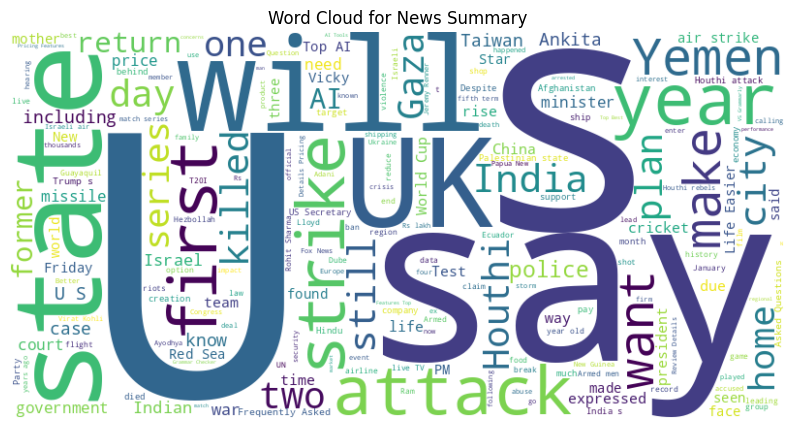

In [ ]:
from wordcloud import WordCloud

# Concatenate all summaries into a single string
text = ' '.join(tcombined_news_df['Summary'].dropna())

# Generate the word cloud to visualize the most frequent words in a Summary column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for News Summary')
plt.show()


In [ ]:
tcombined_news_df.describe()

,Title,Link,Published,Summary,Training_summary
count,801,801,753,772,801
unique,448,442,426,413,448
top,McDonald's hit by Israel-Gaza 'misinformation',https://www.bbc.co.uk/news/business-67885910?a...,"Wed, 10 Jan 2024 00:00:11 GMT",,McDonald's hit by Israel-Gaza 'misinformation'...
freq,4,4,4,9,4


In [ ]:
tcombined_news_df['Training_summary'][0]

"'MS Dhoni has given me two-three...': Shivam Dube 0      Shivam Dube marked his impactful comeback to t...\n1                                                       \n2                                                       \n3                                                       \n4      India's proactive approach to data security an...\n                             ...                        \n796    Students Sue Harvard, Calling It a ‘Bastion’ o...\n797    U.S. Criminally Charges EBay in Cyberstalking ...\n798    Grand Jury Declines to Indict Ohio Woman Who M...\n799          ‘Cooking With Lynja’ TikTok Star Dies at 67\n800           An Oatmeal Cookie Recipe for Raisin Haters\nName: Summary, Length: 801, dtype: object"

In [ ]:
# fine-tuning BERT model using Training_summary
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='Training_summary')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='tanh', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Training_summary (InputLay  [(None,)]                    0         []                            
 er)                                                                                              
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['Training_summary[0][0]']    
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                       

In [ ]:
a=tcombined_news_df[:]['Training_summary']

In [ ]:
a=a.to_list()

In [ ]:
a

["'MS Dhoni has given me two-three...': Shivam Dube 0      Shivam Dube marked his impactful comeback to t...\n1                                                       \n2                                                       \n3                                                       \n4      India's proactive approach to data security an...\n                             ...                        \n796    Students Sue Harvard, Calling It a ‘Bastion’ o...\n797    U.S. Criminally Charges EBay in Cyberstalking ...\n798    Grand Jury Declines to Indict Ohio Woman Who M...\n799          ‘Cooking With Lynja’ TikTok Star Dies at 67\n800           An Oatmeal Cookie Recipe for Raisin Haters\nName: Summary, Length: 801, dtype: object",
 "Checked-in bag tampered with, flyer loses Rs 1 lakh 0      Shivam Dube marked his impactful comeback to t...\n1                                                       \n2                                                       \n3                                     

In [ ]:
text_preprocessed = bert_preprocess(a)

In [ ]:
bert_results = bert_encoder(text_preprocessed)

In [ ]:
bert_results['pooled_output']

<tf.Tensor: shape=(801, 768), dtype=float32, numpy=
array([[-0.7207179 , -0.4870553 , -0.83124995, ..., -0.48202974,
        -0.6536602 ,  0.63485974],
       [-0.7819987 , -0.51851064, -0.83582246, ..., -0.5065928 ,
        -0.6711093 ,  0.7140176 ],
       [-0.71681017, -0.46822914, -0.8798051 , ..., -0.5109858 ,
        -0.6521222 ,  0.65520525],
       ...,
       [-0.7992321 , -0.5949907 , -0.92313194, ..., -0.70442575,
        -0.71998197,  0.6837551 ],
       [-0.69957006, -0.5398341 , -0.8261312 , ..., -0.48442978,
        -0.6629221 ,  0.648444  ],
       [-0.6773401 , -0.5277959 , -0.8964684 , ..., -0.6464208 ,
        -0.65540785,  0.56750715]], dtype=float32)>

In [ ]:
bert_a=bert_results['pooled_output']
bert_a.shape

TensorShape([801, 768])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=25, random_state=0).fit(bert_a)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_data = kmeans.predict(bert_a)

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
cluster_labels

array([ 8,  3, 23,  7, 14, 23,  6,  8, 21,  8,  1,  9,  0,  1, 14, 23,  8,
        6,  9,  9,  0,  9, 23, 14, 13, 23,  2,  1,  7,  8, 14,  8,  9,  6,
        3,  8, 17, 14, 24, 11,  0,  9, 11,  6, 20, 13, 13,  0, 20, 12,  9,
       22, 20,  6,  3,  3,  6, 17, 21,  6,  7,  4, 21,  2,  6, 11, 20, 24,
       21,  1,  6, 21,  9,  6, 11, 19,  4, 12, 17, 14, 24, 11,  0,  9, 11,
        6, 20, 13, 13,  0, 20, 12,  9, 22, 20,  6,  3,  3,  6, 17, 21,  6,
        7,  4, 21,  2,  6, 11, 20, 24, 21,  1,  6, 21,  9,  6, 11, 19,  4,
       12, 18, 22,  1, 23, 14,  1, 21, 19, 23,  7, 15,  7, 10,  6, 23,  8,
        7, 14, 15, 21,  3,  2,  9,  7, 10,  9, 19,  7,  8,  8, 13,  0, 21,
        1,  0,  3, 12, 13,  9,  7, 23, 23, 21,  7,  3, 24,  2, 12,  1,  3,
        8, 14, 14, 19,  8,  8, 15, 18, 24,  4,  4, 22,  5,  3, 15, 19, 17,
       23,  2, 20, 19,  0, 20, 14,  1, 21, 12, 19,  2, 19,  3, 20,  1,  8,
       21,  7, 20, 21, 20,  7,  7, 23,  5,  6,  6, 13, 20, 16, 15, 16, 21,
       14, 17,  1, 22, 21

In [ ]:
#clicked by user

history = [1,238,65,111]
cluster_id = []
for id in history:
  cluster_id.append(kmeans.predict([bert_a[id]]))
cluster_id
df = tcombined_news_df.loc[history, ['Title','Summary']]
df

,Title,Summary
1,"Checked-in bag tampered with, flyer loses Rs 1...",
238,‘You can’t forget it’: FBI agent recounts deca...,‘You can’t forget it’: FBI agent recounts deca...
65,Ecuador: Watch gunmen threaten presenter on li...,Armed men are seen pointing guns at staff insi...
111,Taiwan election: It's not war young voters wor...,"With high home prices and stagnant wages, youn..."


In [ ]:
import random

Recommendation_news={}
for id in cluster_id:
  ls=[]
  for i in range(len(tcombined_news_df)):
    if cluster_data[i] == id:
      ls.append(i)
  Recommendation_news[id.item()]=ls
  print("Cluster id: ",list(id),"Posts under this cluster: ",ls)
Recommendation_news


#getting news from master_DB from the above feed data

selected_recommendation_list = []

for id in cluster_id:
  news_master_db = Recommendation_news[id.item()]
  num_random_posts = min(3,len(ls))
  selected_recommendation_list.extend(random.sample(news_master_db, num_random_posts))
print(selected_recommendation_list)
  # print(news_master_db)

Cluster id:  [3] Posts under this cluster:  [1, 34, 54, 55, 96, 97, 140, 155, 164, 169, 183, 200, 249, 272, 288, 297, 320, 341, 342, 400, 415, 424, 429, 443, 500, 509, 556, 570, 578, 579, 586, 609, 610, 653, 668, 677, 682, 696, 713, 762, 786]
Cluster id:  [16] Posts under this cluster:  [217, 219, 231, 233, 238, 456, 469, 475, 479, 727, 730, 751]
Cluster id:  [11] Posts under this cluster:  [39, 42, 65, 74, 81, 84, 107, 116, 248, 259, 325, 353, 357, 359, 508, 519, 539, 540, 544, 545, 585, 593, 620, 629, 761, 772]
Cluster id:  [1] Posts under this cluster:  [10, 13, 27, 69, 111, 122, 125, 153, 168, 194, 202, 223, 232, 236, 250, 256, 276, 289, 321, 382, 385, 413, 428, 449, 463, 467, 493, 498, 510, 516, 550, 563, 589, 601, 624, 635, 638, 666, 681, 707, 734, 745, 763, 769, 790]
[556, 54, 443, 238, 219, 469, 116, 585, 508, 122, 236, 111]


In [ ]:
#combining selected ids of clicked news to make dataframe
Recommended_df = tcombined_news_df.loc[selected_recommendation_list, ['Title','Summary']]

Recommended_df=Recommended_df[Recommended_df['Summary'].str.strip() !='']

Recommended_df = Recommended_df.reset_index().rename(columns={'index': 'id'})

Recommended_df


,id,Title,Summary
0,556,"Stock market today: Sensex surges 600pts, Nift...","Stock market today: Indian benchmark indices, ..."
1,54,'I cannot sleep in peace' - Israelis fearful a...,"As fighting spirals, Israelis living near Leba..."
2,443,How did Sudan go from casting off despotic rul...,How did Sudan go from casting off despotic rul...
3,238,‘You can’t forget it’: FBI agent recounts deca...,‘You can’t forget it’: FBI agent recounts deca...
4,219,Middle East crisis live: US and UK airstrikes ...,Middle East crisis live: US and UK airstrikes ...
5,469,Steven Miles says Queensland crime is not ‘wor...,Steven Miles says Queensland crime is not ‘wor...
6,116,How Ecuador descended into gang violence,A closer look at what is behind the wave of vi...
7,585,Netflix removes film after Hindu group protests,NaN
8,508,Most Frequently Asked Questions About Affiliat...,Most Frequently Asked Questions About Affiliat...
9,122,Here are the 20 specific Fox broadcasts and tw...,Here are the 20 specific Fox broadcasts and tw...


In [ ]:
#testing on the Random String:

def testing(real_data):
  text_preprocessed = bert_preprocess(real_data)
  bert_results = bert_encoder(text_preprocessed)
  Out = bert_results['pooled_output']
  Clu_id = kmeans.predict(Out)   #[bert_a[id]]
  return Clu_id
  # testing_cluster_labels = Clu_id.labels_
  # print(testing_cluster_labels)


real_data="Congress’s ‘Ram Ram’ to Ayodhya Temple Inauguration May Hurt Party’s LS Poll Prospects"
real_data=list(real_data)
clust_id=testing(real_data)
print(clust_id)

[ 5  5 16  5 11  5  5  5  5  5 16  5 11  5  5 16 11  5  5  5 16  4  5 16
  5  4  5  5  5  4  5 16  4  5  5 10  5  5 16  5 16  5 16  5 16 11  5  4
  5  5 16 16  5  5  4 16  5 16 11  4 16 10  5 11  4  4  5  5 16  5  5 16
 10  5  5  5 16 10 11  5  5 10  5  5  4  5]


In [ ]:
def getting_data(cluster_id):
  Recommendation_news={}
  for id in cluster_id:
    ls=[]
    for i in range(len(tcombined_news_df)):
      if cluster_data[i] == id:
        ls.append(i)
    Recommendation_news[id.item()]=ls
    #print("Cluster id: ",list(id),"Posts under this cluster: ",ls)
  Recommendation_news
  #getting news from master_DB from the above feed data
  selected_recommendation_list = []
  for id in cluster_id:
    news_master_db = Recommendation_news[id.item()]
    num_random_posts = min(3,len(ls))
    selected_recommendation_list.extend(random.sample(news_master_db, num_random_posts))
    #print(selected_recommendation_list)
    # print(news_master_db)
  Recommended_df = tcombined_news_df.loc[selected_recommendation_list, ['Title','Summary']]
  Recommended_df=Recommended_df[Recommended_df['Summary'].str.strip() !='']
  Recommended_df = Recommended_df.reset_index().rename(columns={'index': 'id'})
  Recommended_df = Recommended_df.drop_duplicates(subset=['Title', 'Summary'])
  return Recommended_df
Recommended_df1 = getting_data(clust_id)
Recommended_df1

,id,Title,Summary
0,722,Murray Watt says compounding weather events th...,Murray Watt says compounding weather events th...
1,492,‘Wrecked my life’: Horizon victims tell of suf...,‘Wrecked my life’: Horizon victims tell of suf...
2,280,Trump Dreams of Economic Disaster,Trump Dreams of Economic Disaster
6,233,‘Done with Labour and the Tories’: Reform UK a...,‘Done with Labour and the Tories’: Reform UK a...
7,751,‘You can’t forget it’: FBI agent recounts deca...,‘You can’t forget it’: FBI agent recounts deca...
8,475,Politicians from Germany’s AfD met extremist g...,Politicians from Germany’s AfD met extremist g...
9,182,Top secrets come spilling out,Top secrets come spilling out
12,357,US Vulcan rocket launches on Moon mission,The Vulcan rocket lifted off from Cape Canaver...
13,42,Cape Verde reaches malaria-free milestone,The island state becomes the first sub-Saharan...
14,544,An Immigration Shift,An Immigration Shift


from matplotlib import pyplot as plt
Recommended_df1['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Recommended_df1['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

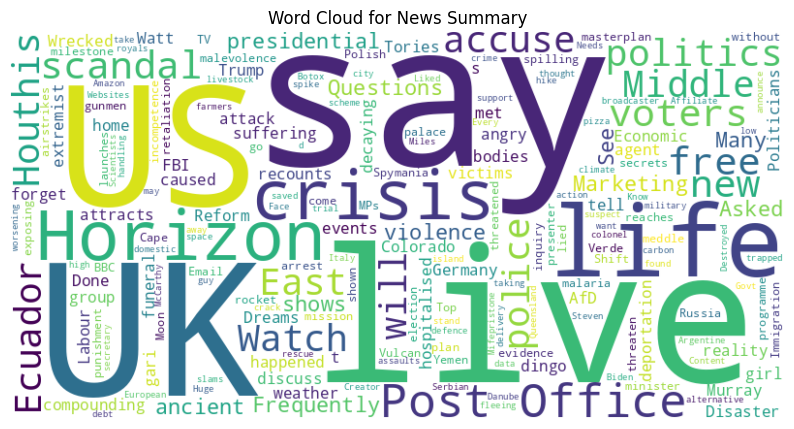

In [ ]:
text = ' '.join(Recommended_df1['Title'].dropna())

# Generate the word cloud to visualize the most frequent words in a Summary column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for News Summary')
plt.show()

In [ ]:
!pip install firebase-admin

In [ ]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

In [ ]:


cred = credentials.Certificate("path/to/serviceAccountKey.json")
firebase_admin.initialize_app(cred)


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/serviceAccountKey.json'